In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as optimize
import pandas as pd
from sklearn.metrics import mean_absolute_error
import time

In [2]:
## Three types of decline curves
# - exponential
# - hyperbolic
# - harmonic

# q = expected production rate at t
# t = time since begining of well
# qi = initial production rate
# b = decline constant
# di = nominal decline rate at t = 0

# b = 1 for harmonics

## ARPS Curves

In [3]:
## Decline Curves:


def Exponential(t, di):
    qi = Data['Production'].max()
    return qi*np.exp(-di*t)
    
def Hyperbolic(t, b, di):
    qi = Data['Production'].max()
    return qi/((1.0+b*di*t)**(1/b))

def Harmonic(t, qi, di):
    return qi/(1+di*t)





{'Exponential': 668.9887700094424, 'Hyperbolic_u': 301.3507177100755, 'Hyperbolic_c': 470.3094107054861}


E:\Anaconda_ssd\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.


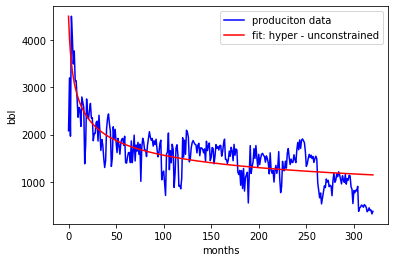

In [4]:
Data = pd.read_csv(r'C:\Users\Preston\Production Model\Texas_well_production.csv')
Data['month'] = Data.index
qi = Data['Production'].max()
x = Data['month'].values
y = Data['Production'].values


#Optimizing Curves
popt, pcov = curve_fit(Exponential, x, y)
exp_vars = popt
popt, pcov = curve_fit(Hyperbolic, x, y)
unconstrained_vars = popt
popt, pcov = curve_fit(Hyperbolic, x, y, bounds= ([0,0], [1,5]))
constrained_vars = popt

#analyzing error
MAE_exp = mean_absolute_error(y, Exponential(x, *exp_vars))
MAE_Hyper = mean_absolute_error(y, Hyperbolic(x, *unconstrained_vars))
MAE_Hyper_constrained = mean_absolute_error(y, Hyperbolic(x, *constrained_vars))

Errors = {
    "Exponential" : MAE_exp,
    "Hyperbolic_u" : MAE_Hyper,
    "Hyperbolic_c" : MAE_Hyper_constrained
}

print(Errors)
plt.plot(x,y,'b-', label = 'produciton data')

if max(Errors) == "Exponential":
    plt.plot(x, Exponential(x, *exp_vars), 'y-', label = 'fit: exp' )
elif max(Errors) == "Hyperbolic_u":
    plt.plot(x, Hyperbolic(x, *unconstrained_vars), 'r-', label = 'fit: hyper - unconstrained' )
else:
    plt.plot(x, Hyperbolic(x, *constrained_vars), 'g-', label = 'fit: hyper - constrained' )
    
plt.xlabel('months')
plt.ylabel('bbl')
plt.legend()
plt.show()

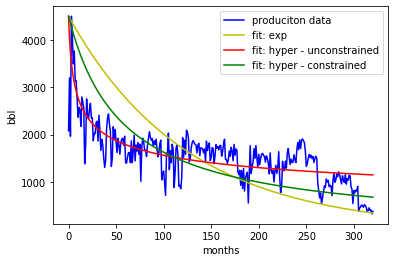

In [5]:
##   All Curves-

plt.plot(x,y,'b-', label = 'produciton data')
plt.plot(x, Exponential(x, *exp_vars), 'y-', label = 'fit: exp' )
plt.plot(x, Hyperbolic(x, *unconstrained_vars), 'r-', label = 'fit: hyper - unconstrained' )
plt.plot(x, Hyperbolic(x, *constrained_vars), 'g-', label = 'fit: hyper - constrained' )
plt.xlabel('months')
plt.ylabel('bbl')
plt.legend()
plt.show()


## More Complex Curves

In [21]:
## Baysian Ridge Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [7]:
x = Data['month'].values
y = Data['Production'].values
X = x.reshape(-1,1)
n, m = X.shape
I = np.identity(m)


E:\Anaconda_ssd\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92477e-22): result may not be accurate.
  overwrite_a=True).T


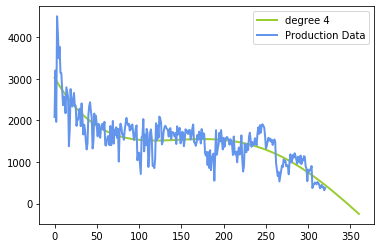

In [8]:
## Ridge Regression:

X = x[:, np.newaxis]

x_plot = np.linspace(0, 360, 100)
X_plot = x_plot[:, np.newaxis]


## potential colors to use = ['teal', 'yellowgreen', 'gold']
lw = 2

degree = 4

model = Pipeline(steps=[('poly', PolynomialFeatures(degree)),
                ('ridge', Ridge(fit_intercept=True))])
model.fit(X, y)
y_plot = model.predict(X_plot)

plt.plot(x_plot, y_plot, color= 'yellowgreen', linewidth=lw,
            label="degree %d" % degree )

plt.plot(X, y, color='cornflowerblue', linewidth=lw,
         label="Production Data")

#plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.legend(loc='upper right')
plt.show()

In [9]:
#zero_plot = 0
#Zero_plot = zero_plot[:, np.newaxis]

Zero = [[0]]
Zero_pred = model.predict(Zero)
print(Zero_pred)

#model.named_steps['ridge'].intercept_
#print(model.predict([0]))

[3026.32570304]


In [10]:
def to_solve(x):
    a = [[x]]
    solve = model.predict(a)
#    return solve

to_solve(50)

#scipy.optimize.minimize

In [11]:
#bnds = ((0, 100))
#res = optimize.minimize(to_solve, 50, bounds=bnds, tol=1e-10)
#print(res.x)

E:\Anaconda_ssd\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda_ssd\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


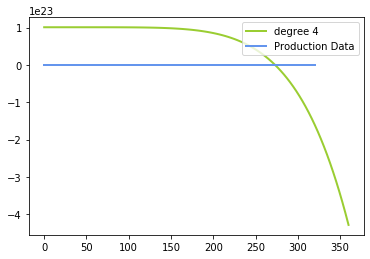

In [24]:
from sklearn.svm import SVR
x = Data['month'].values
X = x.reshape(-1,1)
y = Data['Production'].values

SVR_model = SVR(kernel='poly', C=1.0, epsilon=0.02, degree = 6, max_iter= 1000000)
SVR_model.fit(X, y)

x_plot = np.linspace(0, 360, 100)
X_plot = x_plot[:, np.newaxis]
y_plot = SVR_model.predict(X_plot)

plt.plot(x_plot, y_plot, color= 'yellowgreen', linewidth=lw,
            label="degree %d" % degree )

plt.plot(X, y, color='cornflowerblue', linewidth=lw,
         label="Production Data")

plt.legend(loc='upper right')
plt.show()

In [31]:
svr = GridSearchCV(SVR(gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)
                               "kernel" : ['rbf', 'sigmoid']
                              })

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))

plt.scatter(X, y, c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))

plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))

SyntaxError: invalid syntax (<ipython-input-31-6ea8919c5b49>, line 4)

In [30]:
intercept = model.fit(X, y)
intercept.intercept_

print('Intercept: \n', model.intercept_)

E:\Anaconda_ssd\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92477e-22): result may not be accurate.
  overwrite_a=True).T


AttributeError: 'Pipeline' object has no attribute 'intercept_'

In [ ]:
## Finding the reserves:

from sklearn.metrics import auc


dx = 5
xx = np.arange(1,100,dx)
yy = np.arange(1,100,dx)

print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('computed AUC using np.trapz: {}'.format(np.trapz(yy, dx = dx)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [69]:
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

ValueError: Invalid parameter alpha_init for estimator BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=1e-06, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

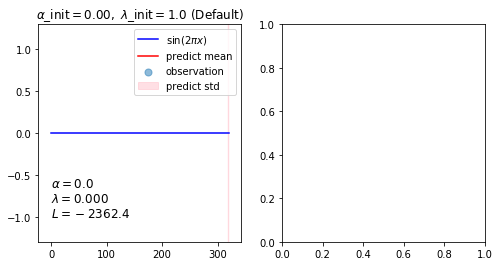

In [70]:
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()